In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path =glob(r'E:\DATA-SCIENCE-INTERNSHIP/*')[1]

In [3]:
file_path

'E:\\DATA-SCIENCE-INTERNSHIP\\Pharma_data_analysis.xlsx'

In [4]:
data = pd.read_excel(file_path , sheet_name='Pharma_data')

In [5]:
data.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Åšwiecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,CzeladÅº,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


# Data Preprocessing

In [6]:
# check data shape
data.shape

(254082, 18)

# Remove unuse columns

In [7]:
data.drop(['Customer Name','Latitude','Longitude'],axis = 1 , inplace = True)

In [8]:
# Check Null value
data.isna().sum()

Distributor          0
City                 0
Country              0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
dtype: int64

In [9]:
# Check the data type of columns
data.dtypes

Distributor           object
City                  object
Country               object
Channel               object
Sub-channel           object
Product Name          object
Product Class         object
Quantity             float64
Price                  int64
Sales                float64
Month                 object
Year                   int64
Name of Sales Rep     object
Manager               object
Sales Team            object
dtype: object

# Yearly Revenue

Text(0.5, 1.0, 'Yearly Revenue')

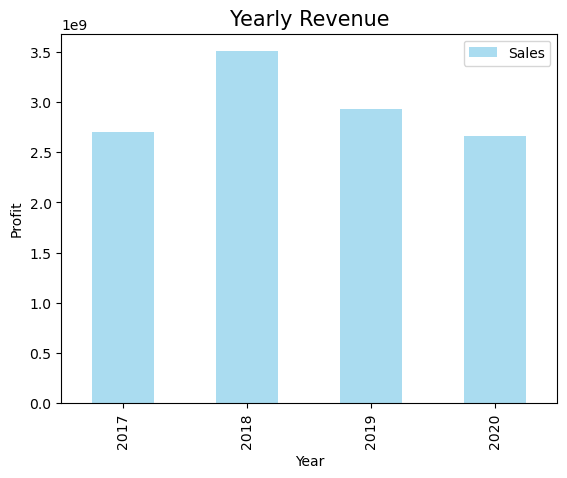

In [10]:
data_sales = pd.DataFrame(data.groupby('Year')['Sales'].sum())
data_sales['Sales'] = data_sales['Sales'].apply(lambda x: int(x))
data_sales.plot(kind='bar', color='skyblue', alpha=0.7 ,ylabel = 'Profit',fontsize = 10).set_title('Yearly Revenue', fontsize = 15)

:- This Graph shows its Highest profit in 2018 company made a profit of 3506897353  amount, and its lowest profit in 2020 company make profit of 2659672415

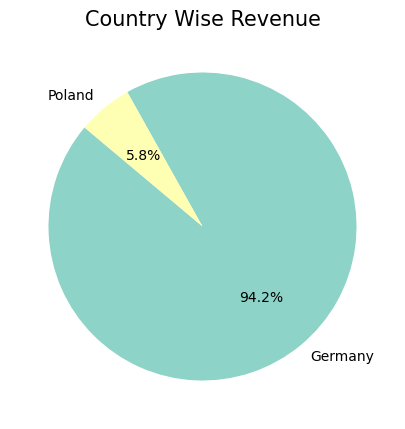

In [179]:
# County Wise revenue Contribution
data_country = data.groupby('Country')['Sales'].sum()
plt.figure(figsize = (10,5))
plt.title('Country Wise Revenue' ,fontsize =15)
plt.pie(data_country,labels=set(['Germany' ,'Poland']), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.show()

:- This Pie chart shows that is Company's total revenue in Poland contribution is 94.2% and Germany's contribution is very less 5.8%

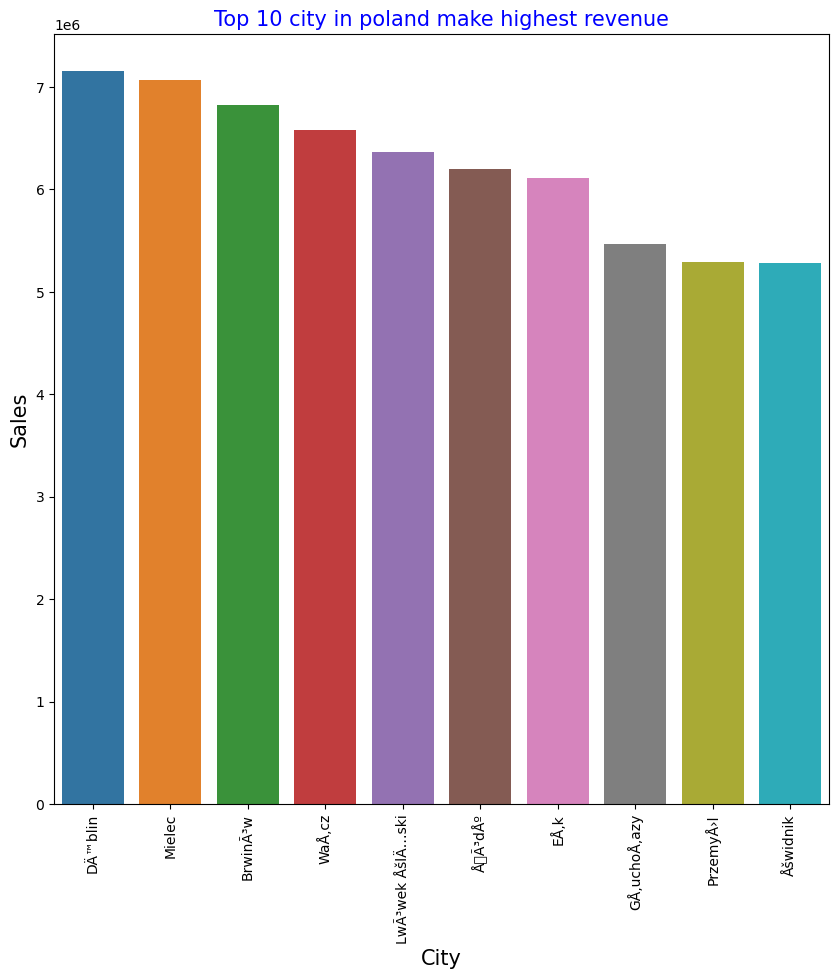

In [180]:
# Top 10 city in poland make highest revanue
data_poland =data[data['Country'] == 'Poland'].reset_index(drop = 'Frist')
df=data_poland.groupby('City')['Sales'].sum().sort_values(ascending = False).reset_index()
df = df[0:10]
plt.figure(figsize=(10,10))
plt.title('Top 10 city in poland make highest revenue' , fontsize = 15 , color = 'b')
plt.xlabel('City' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
sns.barplot(x = df['City'] ,y = df['Sales'] )
plt.xticks(rotation =90)
plt.show()

:- Top 10 city in poland highest revenue

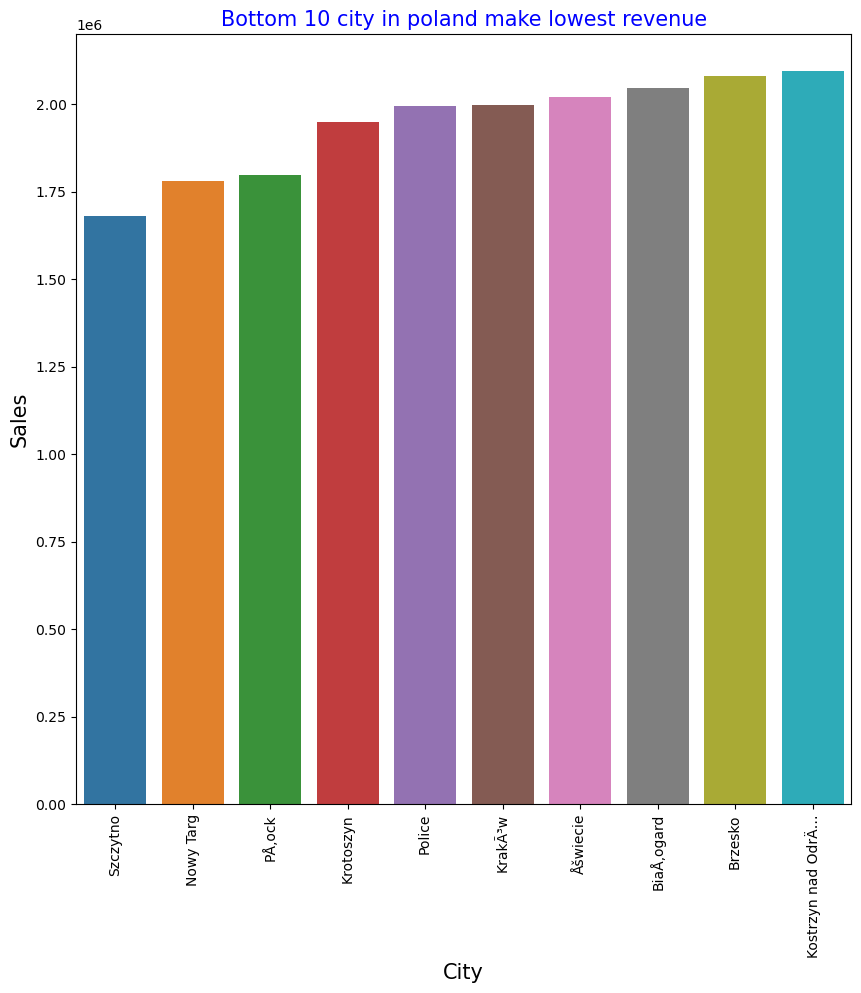

In [15]:
# Bottom 10 city in poland make Lowest revanue
data_poland =data[data['Country'] == 'Poland'].reset_index(drop = 'Frist')
df=data_poland.groupby('City')['Sales'].sum().sort_values(ascending = True).reset_index()
df = df[0:10]
plt.figure(figsize=(10,10))
plt.title('Bottom 10 city in poland make lowest revenue' , fontsize = 15 , color = 'b')
plt.xlabel('City' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
sns.barplot(x = df['City'] ,y = df['Sales'] )
plt.xticks(rotation =90)
plt.show()

:- Bottom 10 city in poland make lowest profit

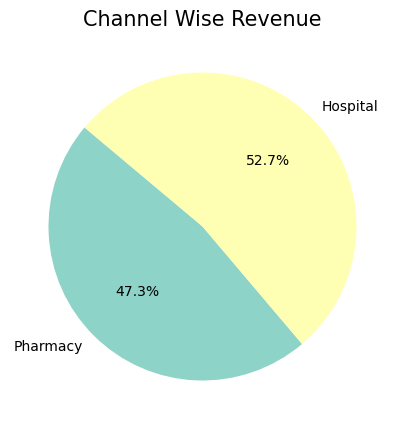

In [30]:
data_channel = data.groupby('Channel')['Sales'].sum()
plt.figure(figsize = (10,5))
plt.title('Channel Wise Revenue' ,fontsize =15)
plt.pie(data_channel,labels=set(['Hospital' , 'Pharmacy']), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.show()

:- Hospital take highest revenue share 52.7% and pharmacy take 47.3%

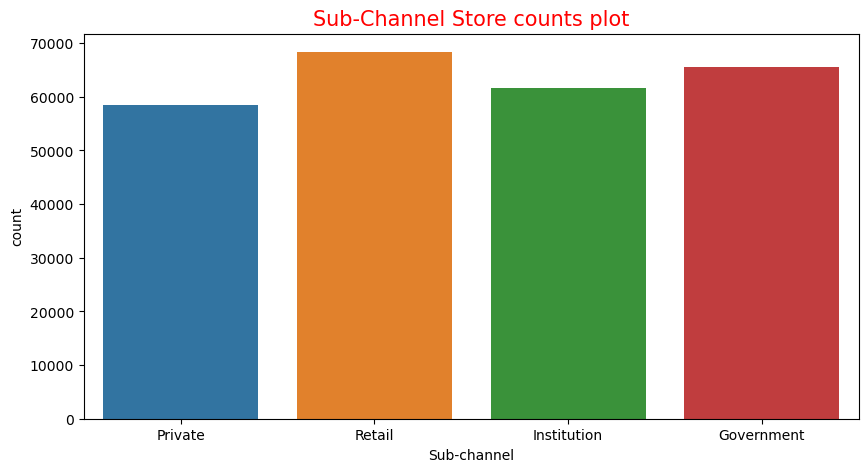

In [46]:
# Sub-channel store 
plt.figure(figsize=(10,5))
plt.title('Sub-Channel Store counts plot',fontsize = 15,color = 'r')
sns.countplot(data['Sub-channel'])
plt.show()

:- Maximium Retail Store and Government store

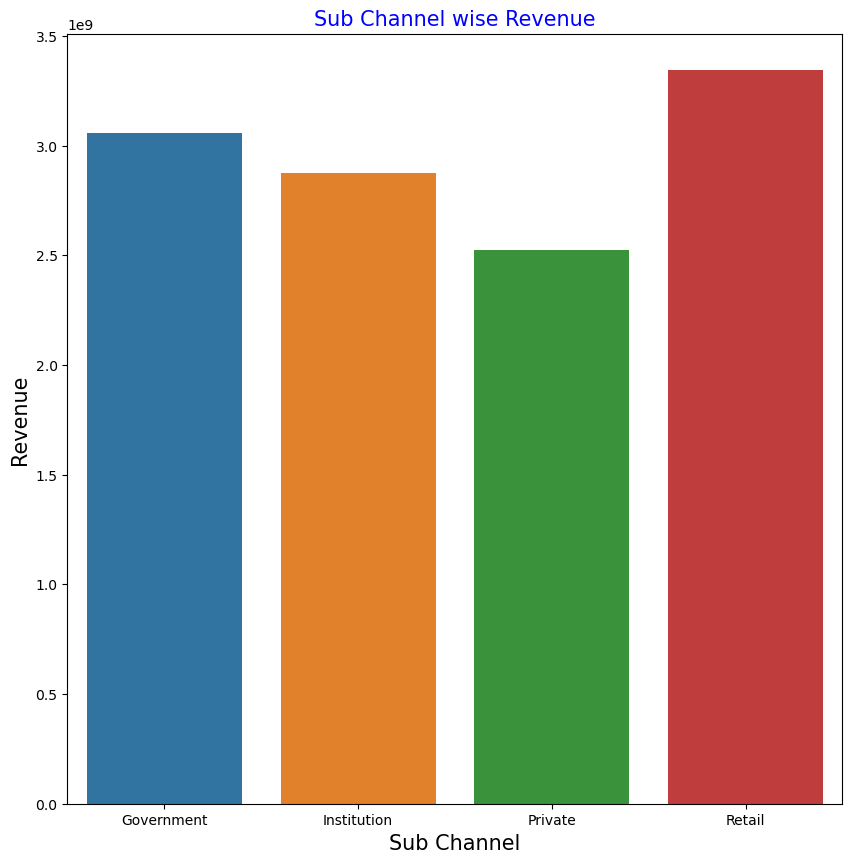

In [69]:
# Sub channel wise revenue
data_sub = pd.DataFrame(data.groupby('Sub-channel')['Sales'].sum()).reset_index()
data_sub['Sales'] = data_sub['Sales'].apply(lambda x: int(x))
plt.figure(figsize=(10,10))
plt.title('Sub Channel wise Revenue' , fontsize = 15 , color = 'b')
sns.barplot(x = data_sub['Sub-channel'] ,y = data_sub['Sales'] )
plt.xlabel('Sub Channel', fontsize =15)
plt.ylabel('Revenue' , fontsize =15)
plt.show()

 :- Highest revenue generate Retail sub channel and lowest revenue generate Private sub channel 
    Retail store number is higher than that reason he generate high revenue and Private store is less he is generate less    revenue.

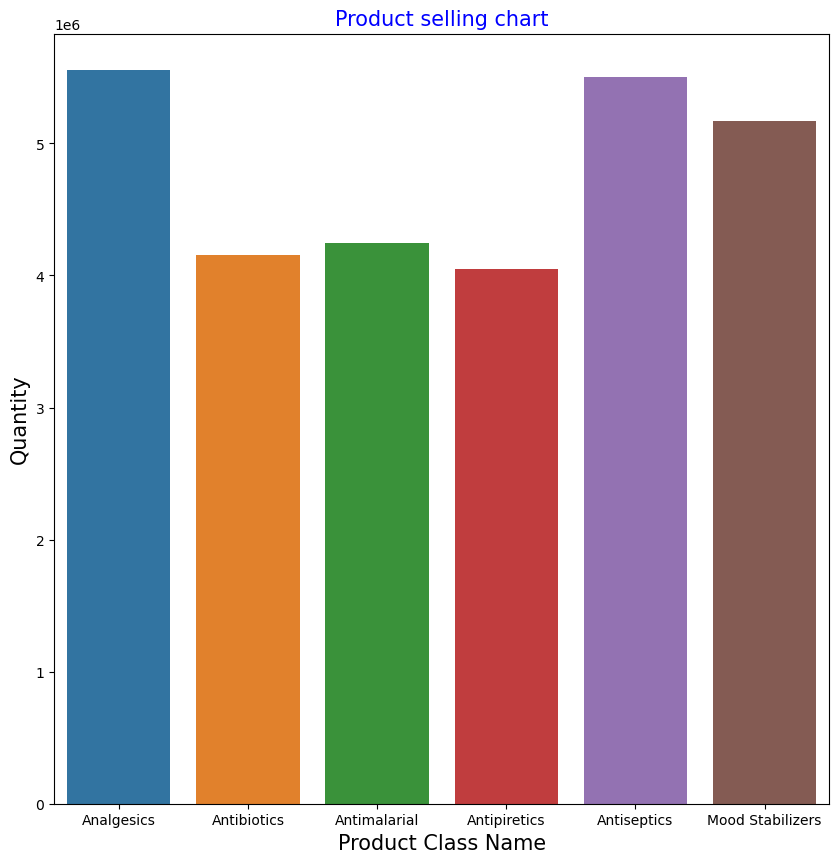

In [84]:
# Product Selling Chart 
data_qty = pd.DataFrame(data.groupby('Product Class')['Quantity'].sum()).reset_index()
data_qty['Quantity'] = data_qty['Quantity'].apply(lambda x: int(x))
plt.figure(figsize=(10,10))
plt.title('Product selling chart' , fontsize = 15 , color = 'b')
sns.barplot(x = data_qty['Product Class'] ,y = data_qty['Quantity'] )
plt.xlabel('Product Class Name', fontsize =15)
plt.ylabel('Quantity' , fontsize =15)
plt.show()

 :- Most of People Buy Analgesics and Antiseptics medicine this is highest buy product class and lowest is Antipiretics 

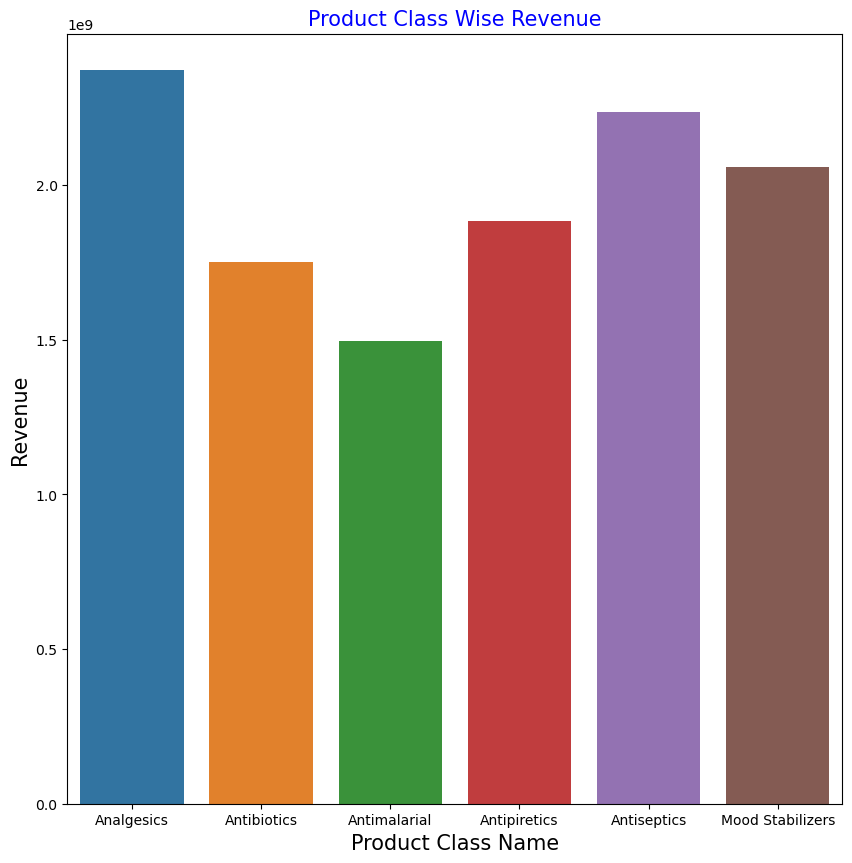

In [96]:
# Product class wise revenue
data_pro=pd.DataFrame(data.groupby('Product Class')['Sales'].sum()).reset_index()
data_pro['Sales'] = data_pro['Sales'].apply(lambda x: int(x))
plt.figure(figsize=(10,10))
plt.title('Product Class Wise Revenue' , fontsize = 15 , color = 'b')
sns.barplot(y = data_pro['Sales'] ,x = data_pro['Product Class'] )
plt.xlabel('Product Class Name', fontsize =15)
plt.ylabel('Revenue' , fontsize =15)
plt.show()

 :- Highest Revenue generate Analgesics Product class and second is Antiseptics product class lowest Revemue Generate is Antimalarial

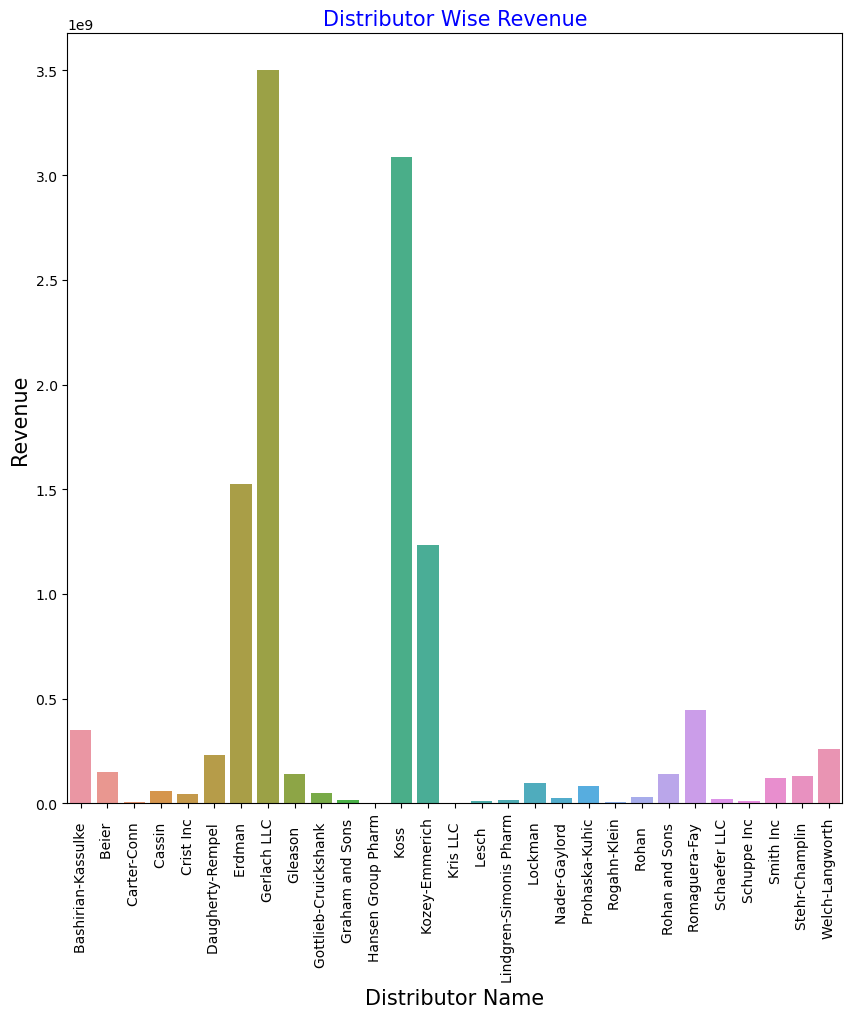

In [107]:
# Distibutor wise Revenue
data_dis = pd.DataFrame(data.groupby('Distributor')['Sales'].sum()).reset_index()
data_dis['Sales'] = data_dis['Sales'].apply(lambda x: int(x))
plt.figure(figsize=(10,10))
plt.title('Distributor Wise Revenue' , fontsize = 15 , color = 'b')
sns.barplot(y = data_dis['Sales'] ,x = data_dis['Distributor'] )
plt.xlabel('Distributor Name', fontsize =15)
plt.ylabel('Revenue' , fontsize =15)
plt.xticks(rotation = 90)
plt.show()

:- Gerlach LLC Distributor is make a highest Reveune for company and second is Koss

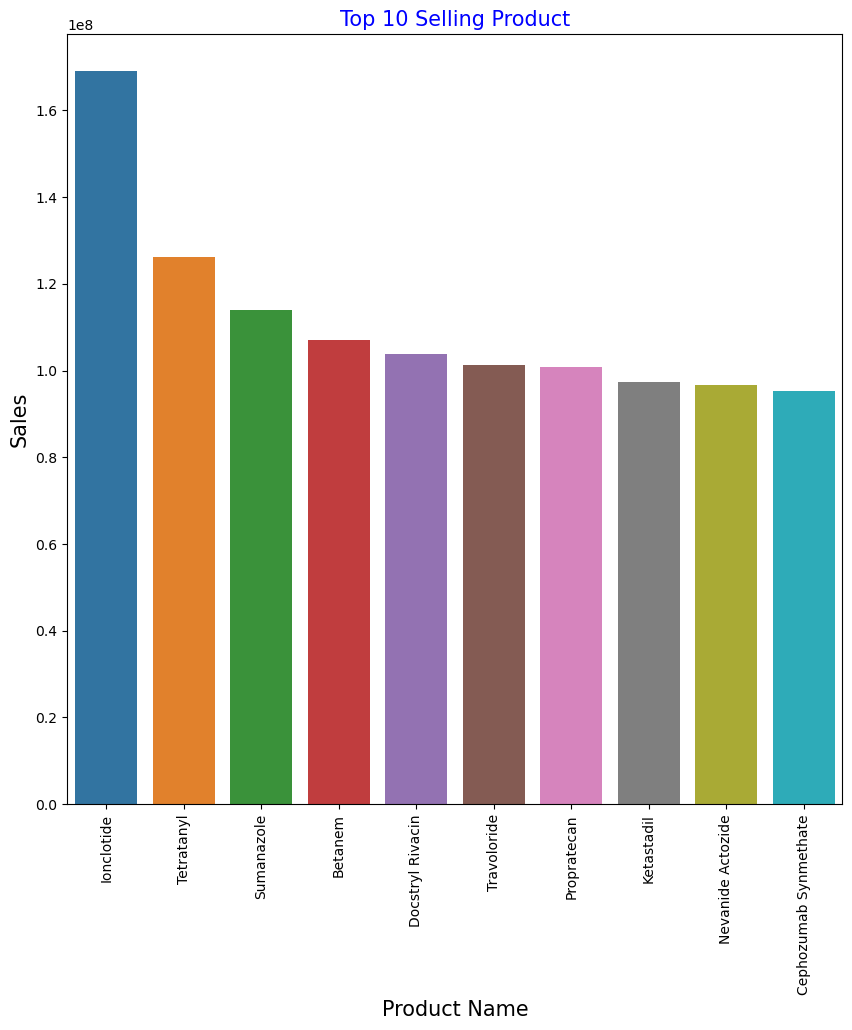

In [129]:
# Top 10 product selling
data_pr =pd.DataFrame(data.groupby('Product Name')['Sales'].sum().sort_values(ascending = False)).reset_index()
df = data_pr[0:10]
plt.figure(figsize=(10,10))
plt.title('Top 10 Selling Product' , fontsize = 15 , color = 'b')
sns.barplot(x = df['Product Name'] ,y = df['Sales'] )
plt.xlabel('Product Name' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
plt.xticks(rotation =90)
plt.show()

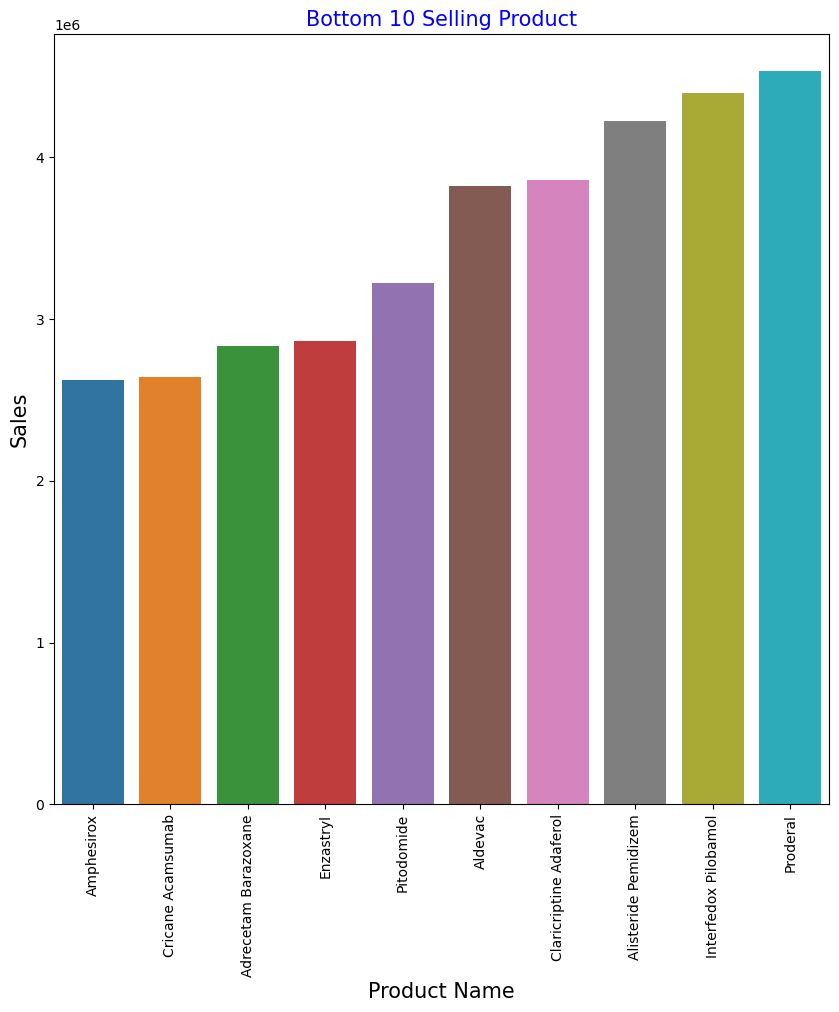

In [130]:
# Bottom 10 product selling
data_pr =pd.DataFrame(data.groupby('Product Name')['Sales'].sum().sort_values(ascending = True)).reset_index()
df = data_pr[0:10]
plt.figure(figsize=(10,10))
plt.title('Bottom 10 Selling Product' , fontsize = 15 , color = 'b')
sns.barplot(x = df['Product Name'] ,y = df['Sales'] )
plt.xlabel('Product Name' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
plt.xticks(rotation =90)
plt.show()

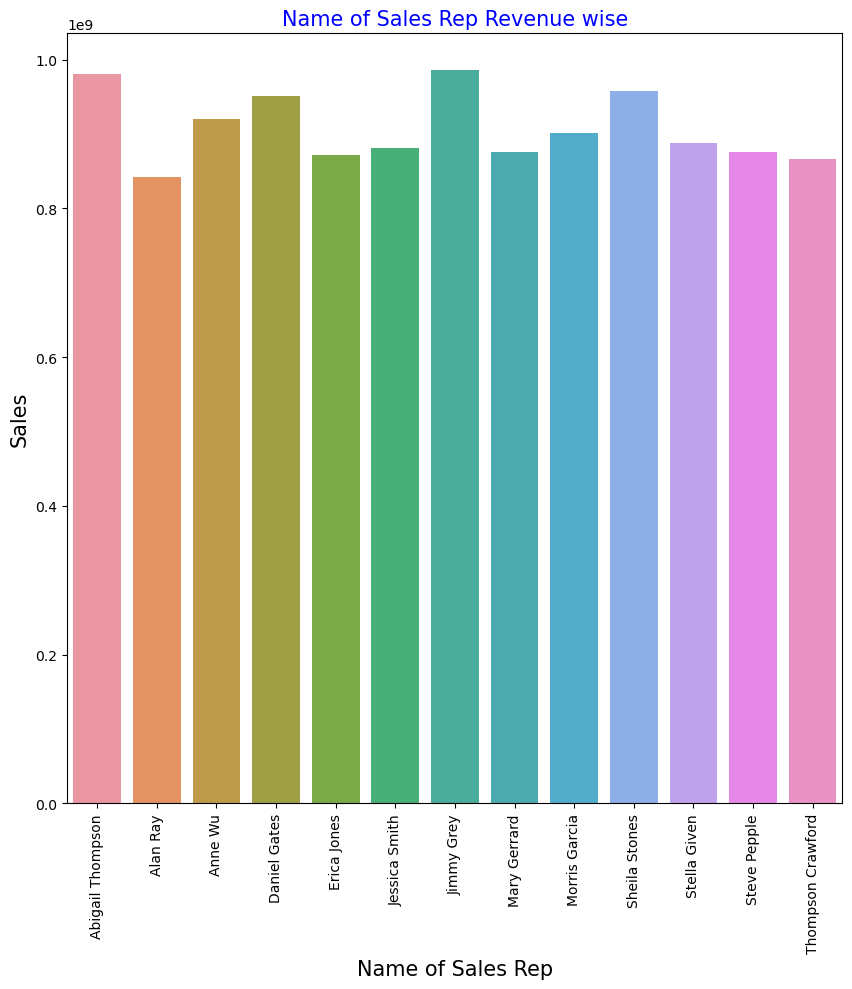

In [149]:
# Name of Sales Rep Revenue wise 
data_name = pd.DataFrame(data.groupby('Name of Sales Rep')['Sales'].sum()).reset_index()
data_name['Sales'] = data_name['Sales'].astype(int)
plt.figure(figsize=(10,10))
plt.title('Name of Sales Rep Revenue wise' , fontsize = 15 , color = 'b')
sns.barplot(x = data_name['Name of Sales Rep'] ,y = data_name['Sales'] )
plt.xlabel('Name of Sales Rep' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
plt.xticks(rotation =90)
plt.show()

:- Jimmy Grey is highest Sales Rep and lowest is Alan Ray 

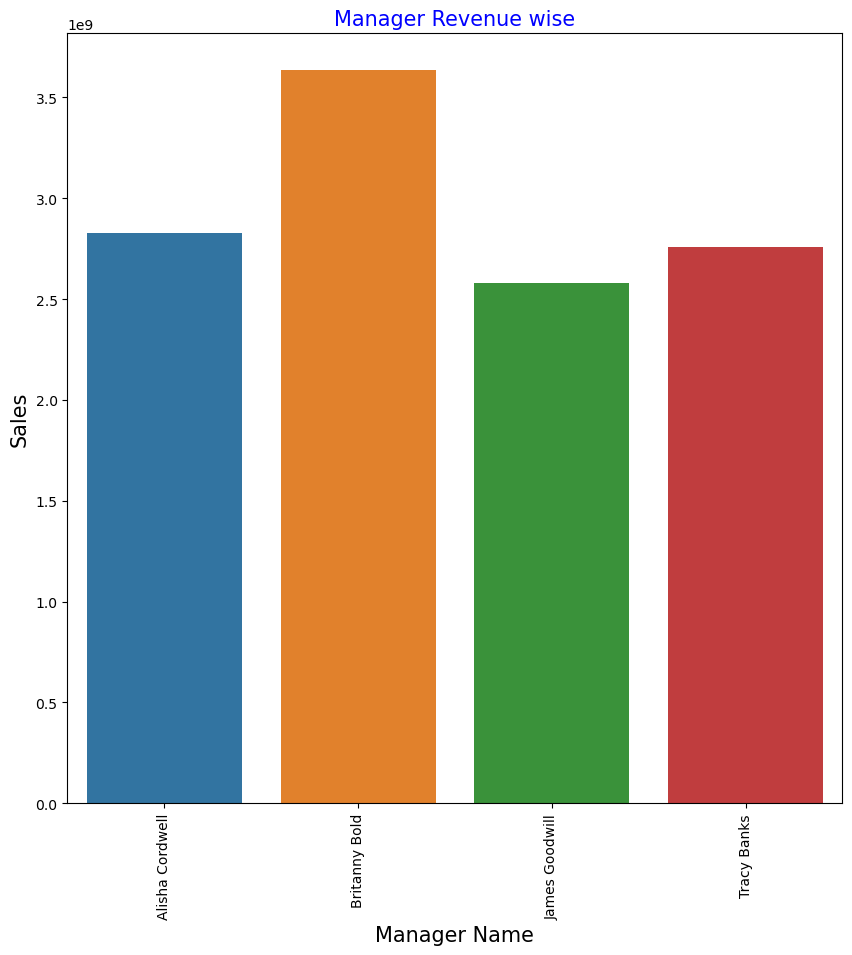

In [162]:
# Manager Wise Revenue Gernate
data_m = pd.DataFrame(data.groupby('Manager')['Sales'].sum()).reset_index()
plt.figure(figsize=(10,10))
plt.title('Manager wise Revenue' , fontsize = 15 , color = 'b')
sns.barplot(x = data_m['Manager'] ,y = data_m['Sales'] )
plt.xlabel('Manager Name' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
plt.xticks(rotation =90)
plt.show()

:- Highest Revenue Generate Manager Name is Britanny Bold And lowest is James Goodwill

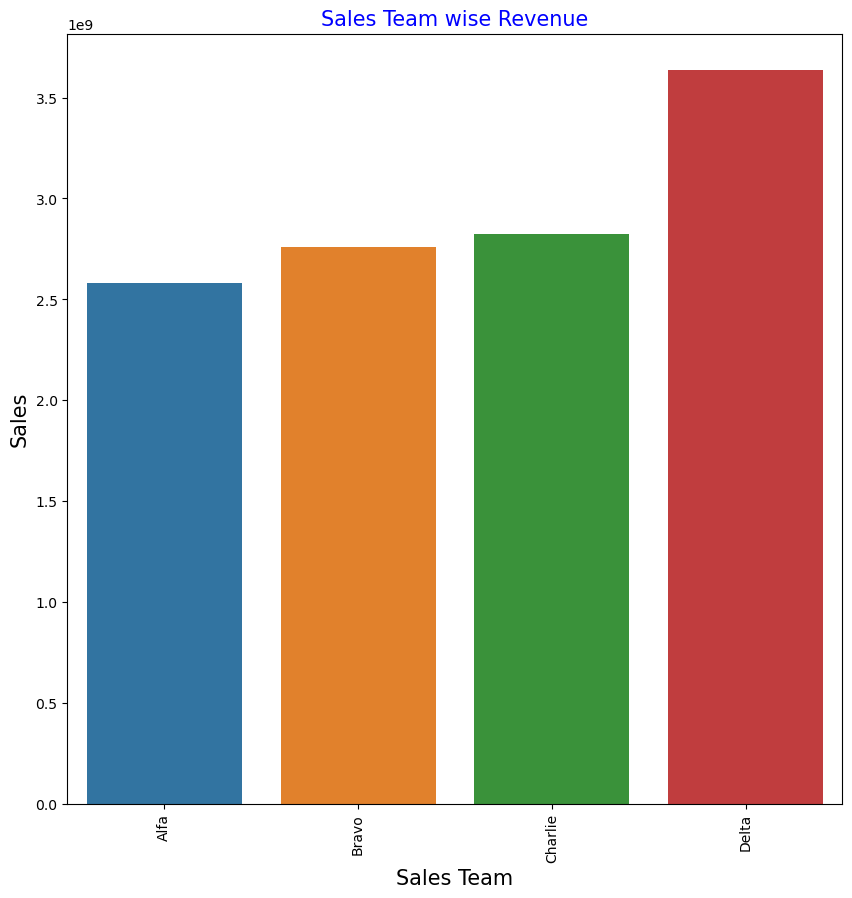

In [176]:
# Sales team wise Revenue
data_team = pd.DataFrame(data.groupby('Sales Team')['Sales'].sum().reset_index())
plt.figure(figsize=(10,10))
plt.title('Sales Team wise Revenue' , fontsize = 15 , color = 'b')
sns.barplot(x = data_team['Sales Team'] ,y = data_team['Sales'] )
plt.xlabel('Sales Team' , fontsize =15)
plt.ylabel('Sales' , fontsize =15)
plt.xticks(rotation =90)
plt.show()

:- Delta Sales Team Performance is very Good He Generates the Highest Revenue for the Company and Alfa Team Contribution is very Low 